# Project 4, APS1070 Fall 2023
#### **Linear Regression -  14 points**
**Deadline: Dec 1st, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Declan Bracken
*   Your **student number**: 1006251324

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files for this notebook on Quercus for grading.


Ref: https://stackoverflow.com/a/64487858

## Part 1 - Getting Started [2 marks]

In this project, we are going to design a mathematical model that predicts the number of shares on social networks.

For this purpose, we are going to use a dataset containing 39,644 instances, where each instance is a set of 61 heterogeneous features about articles published by Mashable in a period of two years. Our goal is to use these features to predict the `shares` column, which is the number of shares of an article in social networks. We will make our predictions by implementing linear regression.

The dataset has been sourced from the Machine Learning Repository of University of California, Irvine [Online News Popularity Data Set (UC Irvine)](https://archive.ics.uci.edu/dataset/332/online+news+popularity).
The UCI page mentions the following publication as the original source of the data set:

*K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence, September, Coimbra, Portugal*

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/Sabaae/Dataset/main/Online_News_Popularity.csv',
    index_col=0
)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[1.5]**
*   Using `train_test_split` from Sklearn, split the dataset into training and validation sets ($80\%$ training, $20\%$ validation). When splitting, set `random_state=1`. **[0.5]**
*   Keep the numerical features only. Then, standardize the data **manually** according to the same method as `StandardScaler` from sklearn, but you may not directly use `StandardScaler'. **[0.5]**
*   Insert a first column of all $1$s in both the training and validation data sets.**[0.5]**
3. Explain why we should not insert the column of $1$s prior to standardization. **[0.5]**

In [2]:
### YOUR CODE HERE ###
print(df)

# Step 1:
# Using train_test_split from Sklearn, split the dataset into training and validation sets
# (80% training, 20% validation). When splitting, set random_state=1
from sklearn.model_selection import train_test_split
# Get training data and
df_no_url = df.drop(columns=["article_url"]) #Keep numerical Features Only
X = df_no_url.drop(columns=["shares"])
y = df_no_url["shares"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 1)

                                             article_url  timedelta  \
0                           amazon-instant-video-browser      731.0   
1                            ap-samsung-sponsored-tweets      731.0   
2                         apple-40-billion-app-downloads      731.0   
3                               astronaut-notre-dame-bcs      731.0   
4                                       att-u-verse-apps      731.0   
...                                                  ...        ...   
39639                                 samsung-app-autism        8.0   
39640  seth-rogen-james-franco-will-live-tweet-the-in...        8.0   
39641                              son-pays-off-mortgage        8.0   
39642                                     ukraine-blasts        8.0   
39643                              youtube-channels-2015        8.0   

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                12.0             219.0         0.663594             

In [3]:
# Create function to standardize a column
def standardize_dataset(X_train, X_val):
  X_train_standard = X_train.copy()
  X_val_standard = X_val.copy()

  #loop through columns and standardize train + val
  for col in X_train:

    column = X_train[col]
    mean = column.mean()
    std = column.std()

    # apply mean/std from training to validation
    X_train_standard[col] = (X_train_standard[col] - mean) / std
    X_val_standard[col] = (X_val_standard[col] - mean) / std

  return X_train_standard, X_val_standard

X_train_standard, X_val_standard = standardize_dataset(X_train, X_val)

In [4]:
# Insert 1's
X_train_standard.insert(0, 'bias', 1)
X_val_standard.insert(0, 'bias', 1)

**Why we can't standardize after applying bias**

If we were to standardize the dataset after applying the column of all 1's to the dataset, the subtraction of the feature's mean (which is 1) would result in the column being full of 0's, which is useless when building an intercept. for the linear regression. Even worse, however, the column has no standard deviation, so we would likely get a divide by 0 error.

## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the inversion, as numpy.linalg.inv may caue an error.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [5]:
### YOUR CODE HERE ###
import numpy as np
from scipy.linalg import inv
from sklearn.metrics import mean_squared_error as mse

# Get values:
X_train_standard_values = np.array(X_train_standard.values)
X_val_standard_values = np.array(X_val_standard.values)
y_train = np.array(y_train.values)
y_val = np.array(y_val.values)

# Compute regression coefficients with training set:
W = np.dot(inv(np.dot(X_train_standard_values.T, X_train_standard_values)), np.dot(X_train_standard_values.T, y_train))

Training root mean squarred error: 12166.051416192777
Validation root mean squarred error: 8267.071111675188


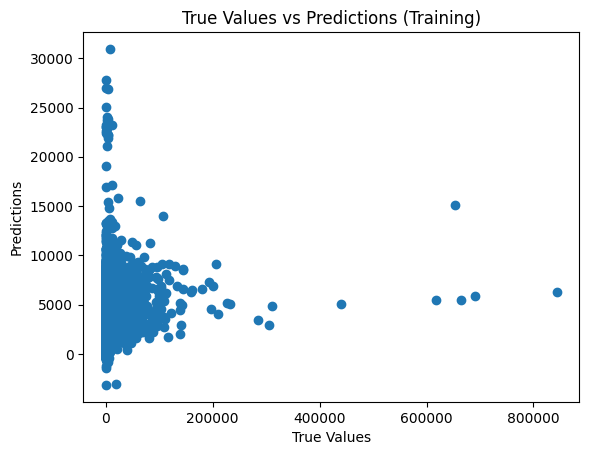

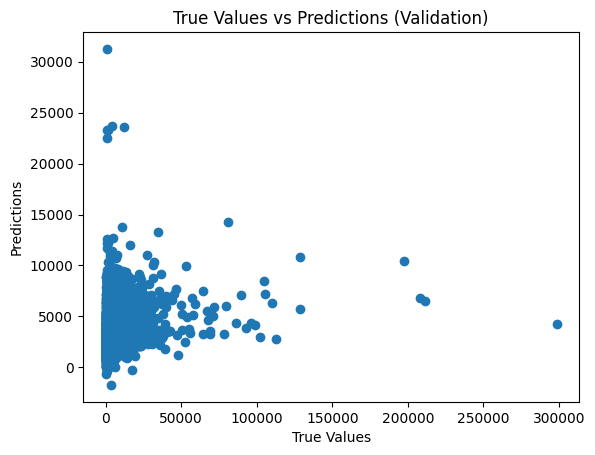

In [6]:
import matplotlib.pyplot as plt

# Compute predictions
train_predictions = X_train_standard_values @ W
val_predictions = X_val_standard_values @ W

# Calculate rmse
train_rmse = np.sqrt(mse(y_train, train_predictions))
val_rmse = np.sqrt(mse(y_val, val_predictions))
print(f"Training root mean squarred error: {train_rmse}")
print(f"Validation root mean squarred error: {val_rmse}")

# Create scatter plot
plt.scatter(y_train, train_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.title('True Values vs Predictions (Training)')
plt.show()

plt.scatter(y_val, val_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.title('True Values vs Predictions (Validation)')
plt.show()

**It appears as though a pure linear regression results in severe underfitting.**

## Part 3 - Full Batch Gradient Descent [4 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data.

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges.

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you calculated in the previous part.

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).
  Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[1]**

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[1]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

* Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[0.5]**

In [9]:
import time
start_time = time.time() ## Records current time
np.random.seed(2)

## GD Script -- Sample code in tutorial! ##

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

--- Total Training Time: 0.00025010108947753906 (s) ---



$\frac{{\partial J}}{\partial w}=\frac{1}{N}[\sum_{i=0}^Nx^{(i)}(y^{(i)}-t^{(i)})]$

$w_{j+1}=w_j-\alpha \times \frac{{\partial J}}{\partial w}$


In [51]:
import matplotlib.pyplot as plt
import time
#function to calculate the gradient
def calculate_grad(X, y, pred):
  N = len(y)
  return 1 / N * X.T @ (pred - y)

def plot_rmse(training_rmse, val_rmse, batch_size, lr):
  # Plotting the RMSE curves
  plt.figure(figsize=(10, 6))
  plt.plot(training_rmse, label='Training RMSE')
  plt.plot(val_rmse, label='Validation RMSE')
  plt.xlabel('Epoch')
  plt.ylabel('RMSE')
  plt.title(f'bs: {batch_size} lr: {lr} - Training and Validation RMSE Curves')
  plt.legend()
  plt.show()


def train_full_batch(X_train, X_val, y_train, y_val, RMSE_direct, lr = 0.001, epochs = 1000, threshold = 1.001):
  # initialize weights:
  W = np.random.rand(X_train.shape[1]) * 0.01
  training_rmse = []
  validation_rmse = []

  start_time = time.time()
  # Loop:
  for i in range(epochs):
    # Predict
    train_prediction = X_train @ W
    validation_prediction = X_val @ W
    # update rmse
    epoch_val_rmse = np.sqrt(mse(y_val, validation_prediction))
    training_rmse.append(np.sqrt(mse(y_train, train_prediction)))
    validation_rmse.append(epoch_val_rmse)
    #check for convergence
    if epoch_val_rmse < threshold * RMSE_direct:
      end_time = time.time()
      print(f"Convergence time: {end_time - start_time}")
      print(f"RMSE converged to: {epoch_val_rmse}")
      plot_rmse(training_rmse, validation_rmse, 'full batch', lr)
      return W, training_rmse, validation_rmse

    #update weights:
    W = W - lr * calculate_grad(X_train, y_train, train_prediction)

  end_time = time.time()
  print(f"Did not converge.\nTime: {end_time - start_time}")
  print(f"Validaiton RMSE: {validation_rmse[-1]}")
  plot_rmse(training_rmse, validation_rmse, 'full batch', lr)
  return W, training_rmse, validation_rmse


Convergence time: 1.5129618644714355
RMSE converged to: 8275.162012189454


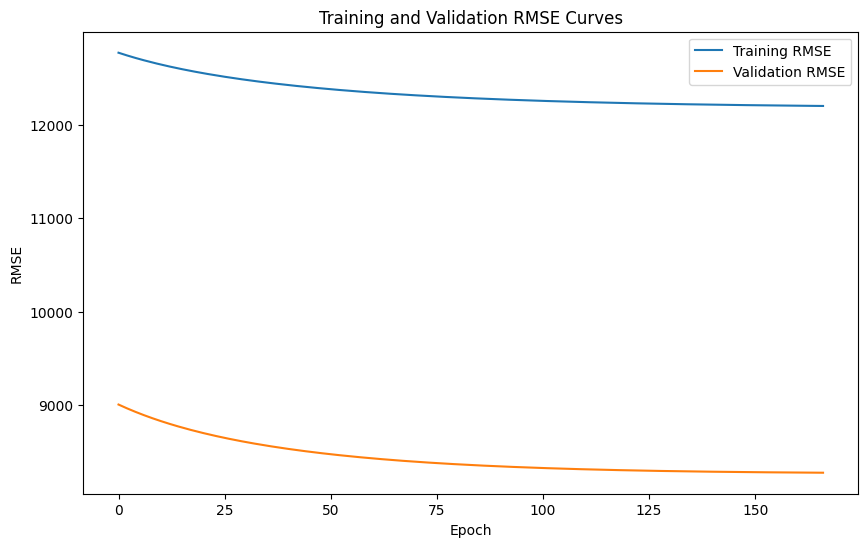

In [8]:
RMSE_direct = 8267
lr = 0.01
Final_weights = train_full_batch(X_train_standard_values, X_val_standard_values, y_train, y_val, RMSE_direct, lr = lr)

The model has certainly not overfit as the training rmse, just as it was with the direct solution, is higher than the validation rmse. We can see that during training both curves begin decreasing and then plateau as they converge to a solution. If anything, it appears as though our model of pure linear regression is severely undefit. Using only straight lines, the model is unable to capture the patterns in the training data, which can sometimes result in the validation set having a lower loss than that of the training.

In deep learning/machine learning through gradient descent, an epoch is when training has completed over an entire dataset, but an iteration is just

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are:
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays:
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes:
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged.
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`.

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

In [50]:
### YOUR CODE HERE ###
#Create DataLoader class
import numpy as np
import pandas as pd

class DataLoader:
    def __init__(self, X, y, batch_size=32, shuffle=True):
        self.X = X
        self.y = y
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indices = np.arange(X.shape[0])

    def __iter__(self):
        # If shuffle is True, reshuffle the indices at the start of each new epoch
        if self.shuffle:
            np.random.shuffle(self.indices)
        # Reset the counter for each new epoch
        self.current_index = 0
        return self

    def __next__(self):
        # If there's no data left, raise StopIteration
        if self.current_index >= len(self.indices):
            raise StopIteration

        # Compute the end index of the batch
        end_index = self.current_index + self.batch_size
        # Generate the next batch indices
        batch_indices = self.indices[self.current_index:end_index]

        # Update the current index to the end of the batch
        self.current_index = end_index

        # Slice the X and y data for the next batch and return
        return self.X[batch_indices], self.y[batch_indices]

def plot_rmse_overtime(training_rmse, val_rmse, elapsed_time, batch_size, lr):
  # Plotting the RMSE curves
  plt.figure(figsize=(10, 6))
  plt.plot(elapsed_time, training_rmse, label='Training RMSE')
  plt.plot(elapsed_time, val_rmse, label='Validation RMSE')
  plt.xlabel('Elapsed Time (s)')
  plt.ylabel('RMSE')
  plt.title(f'bs: {batch_size} lr: {lr} - Training and Validation Curves over Time')
  plt.legend()
  plt.show()

def train_mini_batch(X_train, X_val, y_train, y_val, batch_size, lr, max_increase_factor = 2, RMSE_direct = 8267, epochs = 1000, threshold = 1.001, plot_on = True):
  # initialize weights:
  W = np.random.rand(X_train.shape[1]) * 0.01

  #Initialize train loader:
  Train_loader = DataLoader(X_train, y_train, batch_size=batch_size)

  elapsed_time = []
  training_rmse = []
  validation_rmse = []
  convergence = False

  start_time = time.time()

  for epoch in range(epochs):
    for X_batch, y_batch in Train_loader:
        # Predict
        train_prediction = X_batch @ W
        #update weights:
        W = W - lr * calculate_grad(X_batch, y_batch, train_prediction)

    # Append elapsed time:
    epoch_time = time.time()
    elapsed_time.append(epoch_time - start_time)

    #Get validation and train prediction (use full batch):
    validation_prediction = X_val @ W
    train_prediction = X_train @ W

    # update validation rmse
    epoch_val_rmse = np.sqrt(mse(y_val, validation_prediction))
    validation_rmse.append(epoch_val_rmse)

    # Update training rmse (use full batch)
    training_rmse.append(np.sqrt(mse(y_train, train_prediction)))

    #check for convergence
    if epoch_val_rmse < threshold * RMSE_direct:
      end_time = time.time()
      convergence = True
      print(f"Convergence time: {end_time - start_time}")
      print(f"RMSE converged to: {epoch_val_rmse}")
      if plot_on:
        plot_rmse(training_rmse, validation_rmse, batch_size, lr)
        plot_rmse_overtime(training_rmse, validation_rmse, elapsed_time, batch_size, lr)

      return W, training_rmse, validation_rmse, elapsed_time, convergence

    #check for divergence based on NAN or inf values
    if np.isnan(epoch_val_rmse) or np.isinf(epoch_val_rmse):
      convergence = False
      print("Divergence detected (NaN/Inf in RMSE). Stopping training.")
      if plot_on:
        plot_rmse(training_rmse, validation_rmse, batch_size, lr)
        plot_rmse_overtime(training_rmse, validation_rmse, elapsed_time, batch_size, lr)
      return W, training_rmse, validation_rmse, elapsed_time, convergence

    #check for divergence based on val_rmse increase using some scalar factor
    if epoch > 0 and epoch_val_rmse > max_increase_factor * validation_rmse[-2]:
      print("Divergence detected (rapid increase in RMSE). Stopping training.")
      convergence = False
      if plot_on:
        plot_rmse(training_rmse, validation_rmse, batch_size, lr)
        plot_rmse_overtime(training_rmse, validation_rmse, elapsed_time, batch_size, lr)
      return W, training_rmse, validation_rmse, elapsed_time, convergence

  end_time = time.time()
  convergence = False
  print(f"Did not converge.\nTime: {end_time - start_time}")
  print(f"Validaiton RMSE: {validation_rmse[-1]}")
  if plot_on:
    plot_rmse(training_rmse, validation_rmse, batch_size, lr)
    plot_rmse_overtime(training_rmse, validation_rmse, elapsed_time, batch_size, lr)
  return W, training_rmse, validation_rmse, elapsed_time, convergence

Convergence time: 0.20335984230041504
RMSE converged to: 8267.079425314645


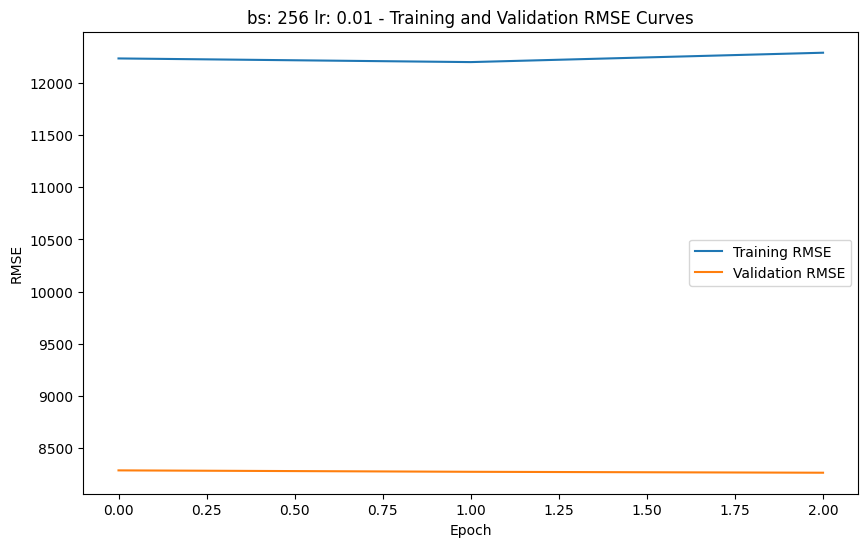

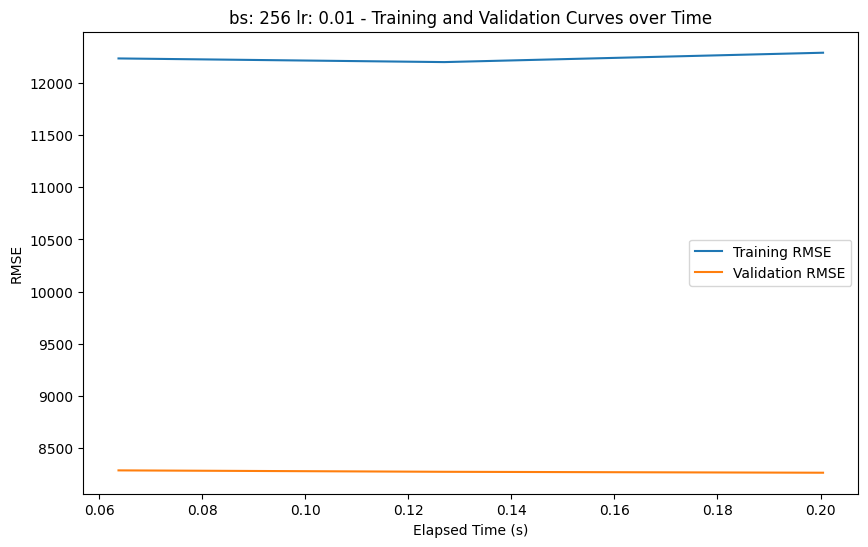

Convergence time: 0.10081315040588379
RMSE converged to: 8266.494751032364


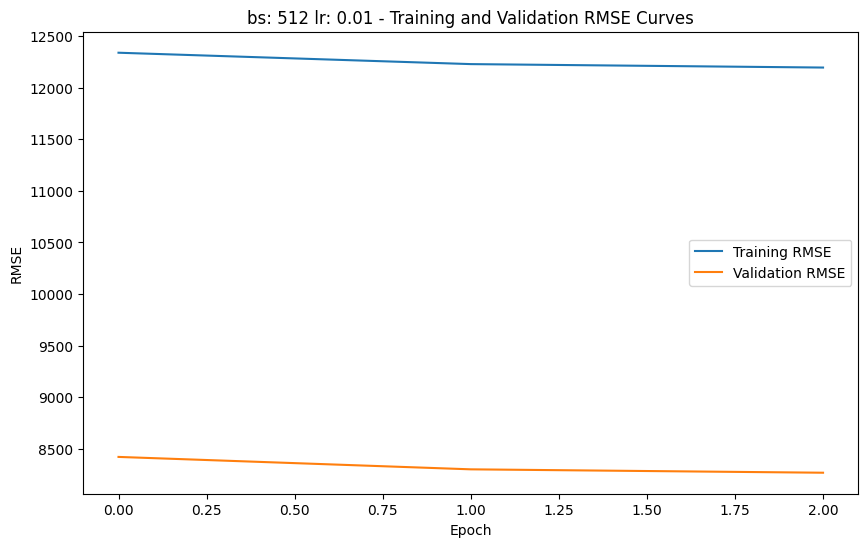

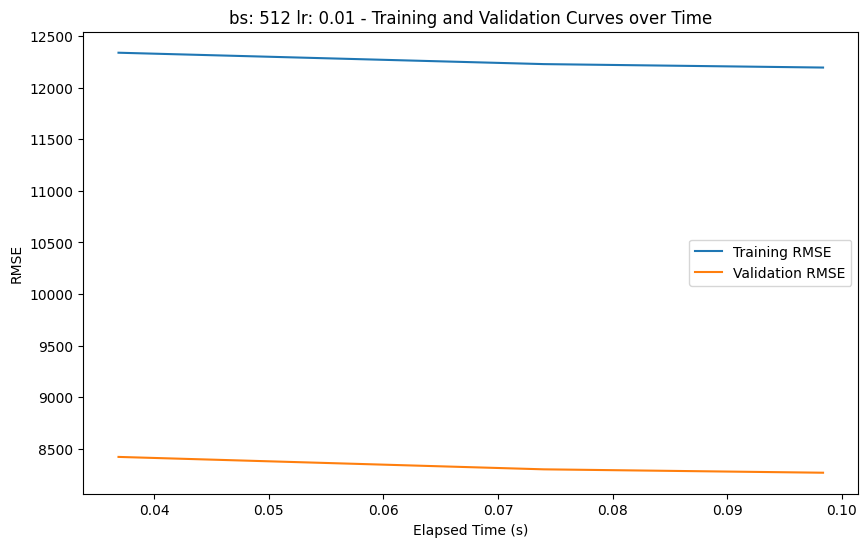

Convergence time: 0.1960906982421875
RMSE converged to: 8273.183060796975


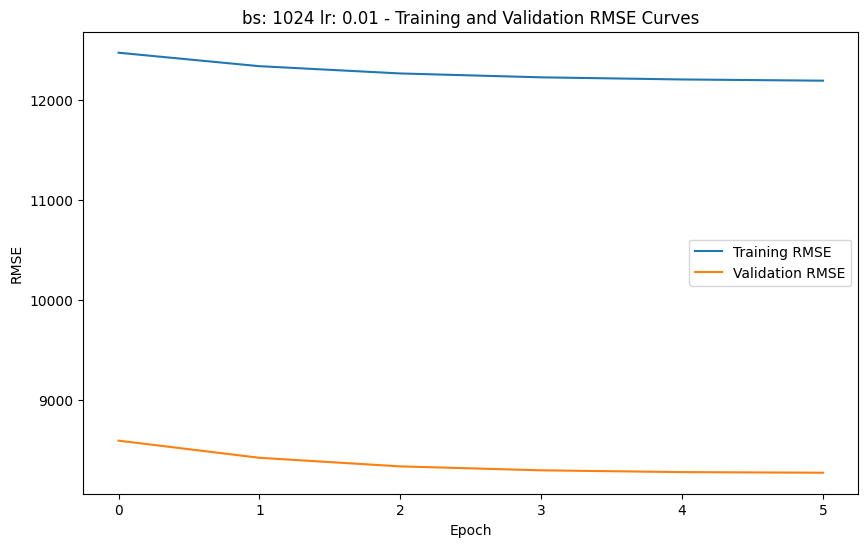

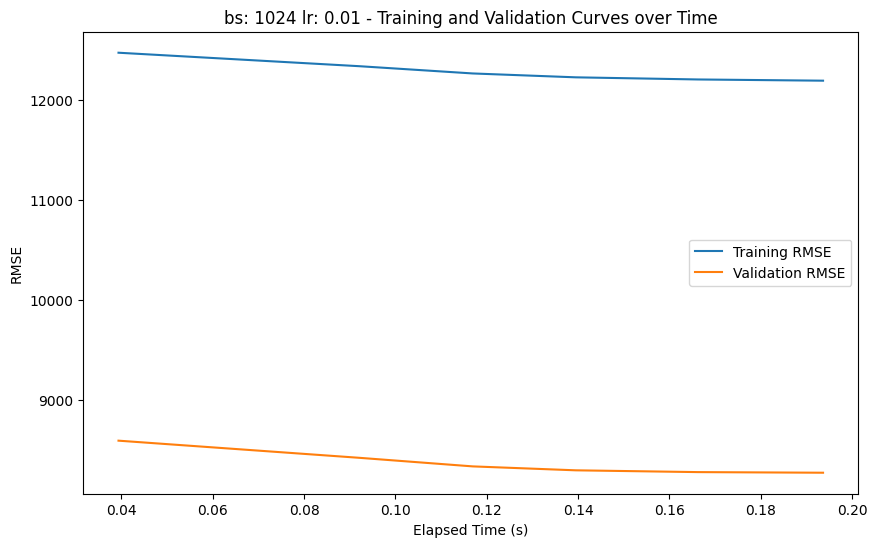

Convergence time: 0.5933513641357422
RMSE converged to: 8274.954908510661


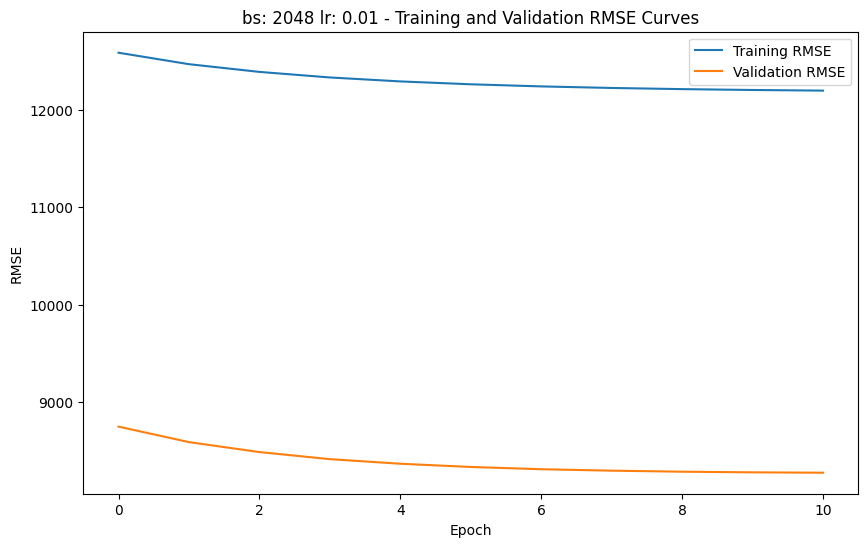

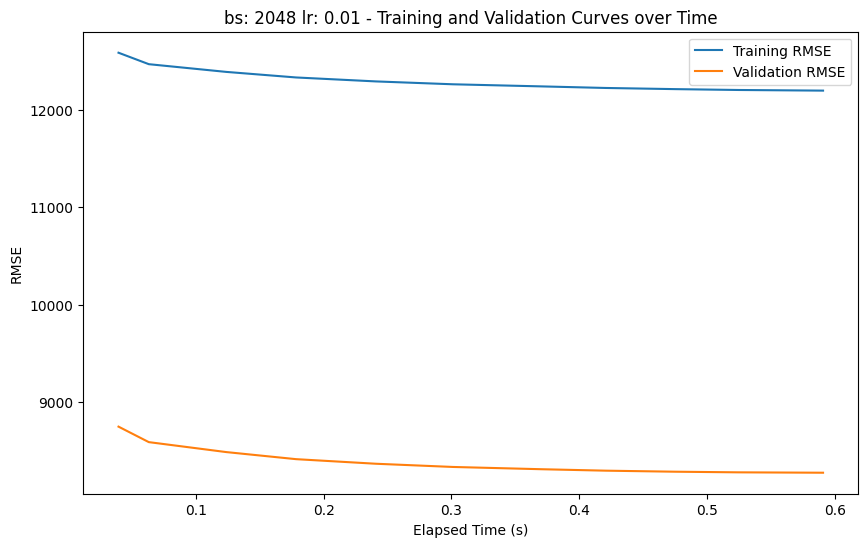

Convergence time: 0.6576745510101318
RMSE converged to: 8273.416429555413


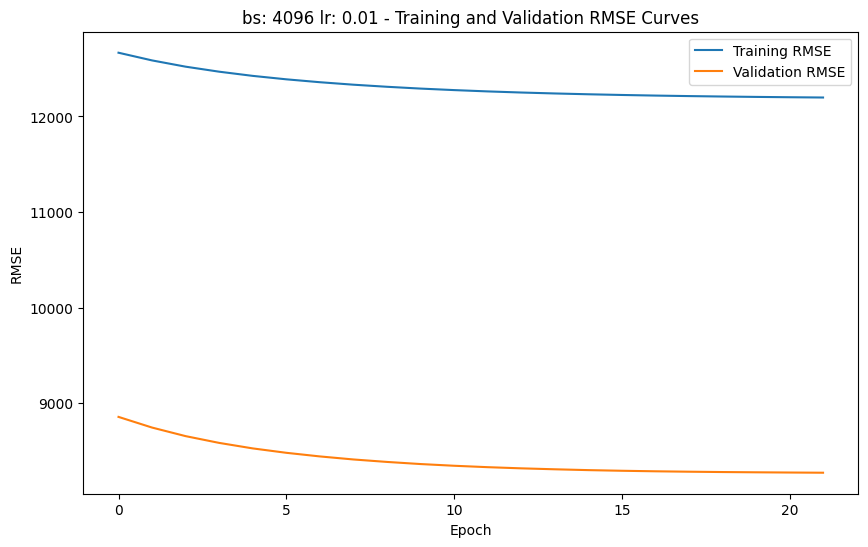

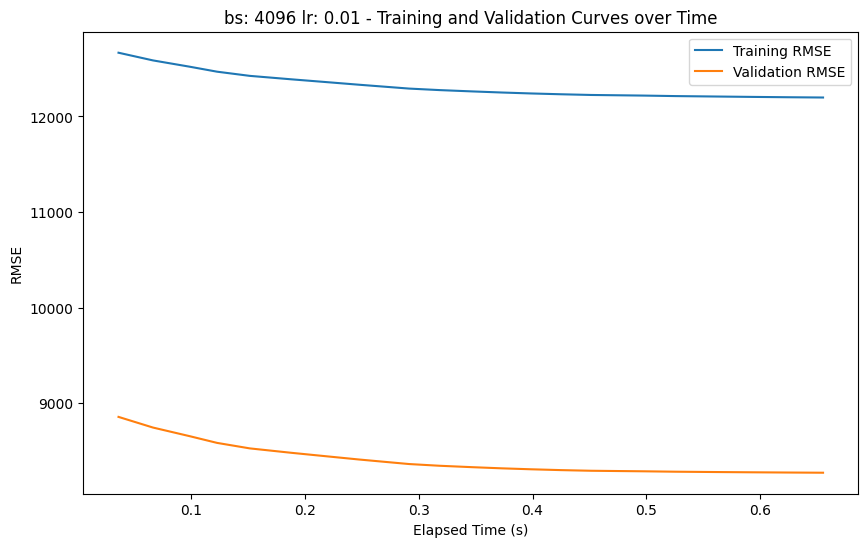

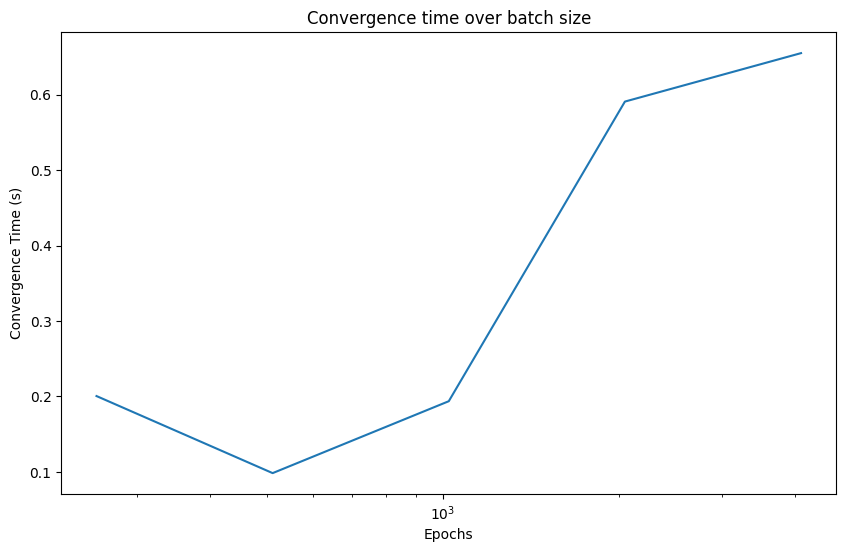

In [52]:
# batch_size = 10000
lr = 0.01
batch_sizes = [256, 512, 1024, 2048, 4096]
final_convergence_time = []
for batch_size in batch_sizes:
  _, _, _, elapsed_time, _ = train_mini_batch(X_train_standard_values, X_val_standard_values, y_train, y_val, batch_size, lr, max_increase_factor = 2, RMSE_direct = 8267, epochs = 1000, threshold = 1.001)
  final_convergence_time.append(elapsed_time[-1])

# Plot convergence time over batch size
plt.figure(figsize = (10,6))
plt.semilogx(batch_sizes, final_convergence_time)
plt.xlabel('Epochs')
plt.ylabel('Convergence Time (s)')
plt.title('Convergence time over batch size')
plt.show()

## Part 5 - Gradient Descent Learning Rate [3 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batch sizes that do not converge with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batch size. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[1]**

2. Select the best batch size based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD.
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[1]**

Divergence detected (rapid increase in RMSE). Stopping training.


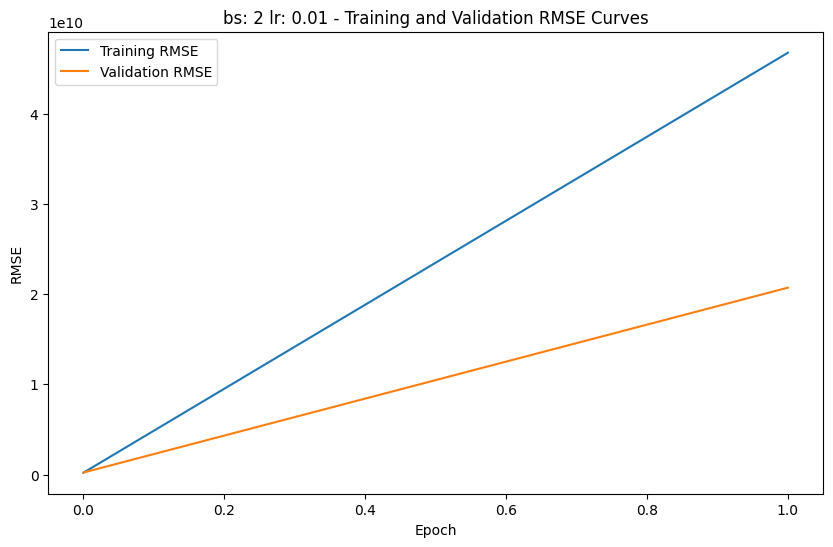

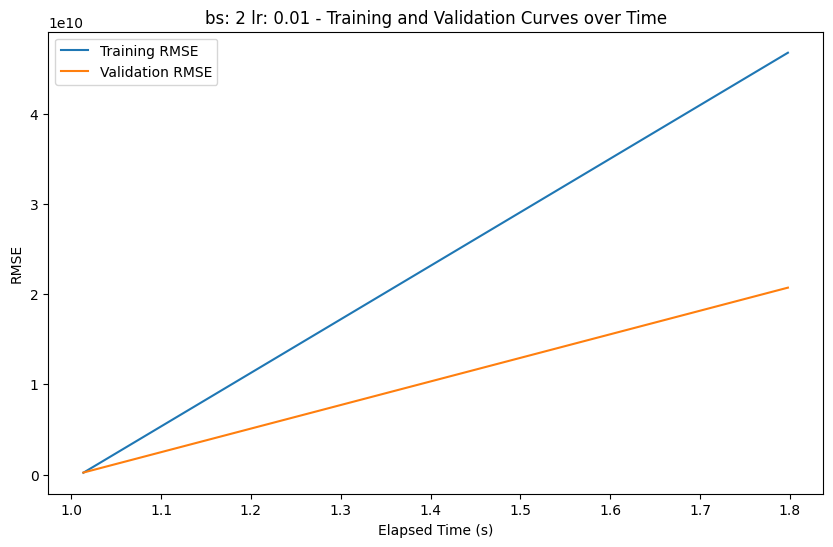

Divergence detected (rapid increase in RMSE). Stopping training.


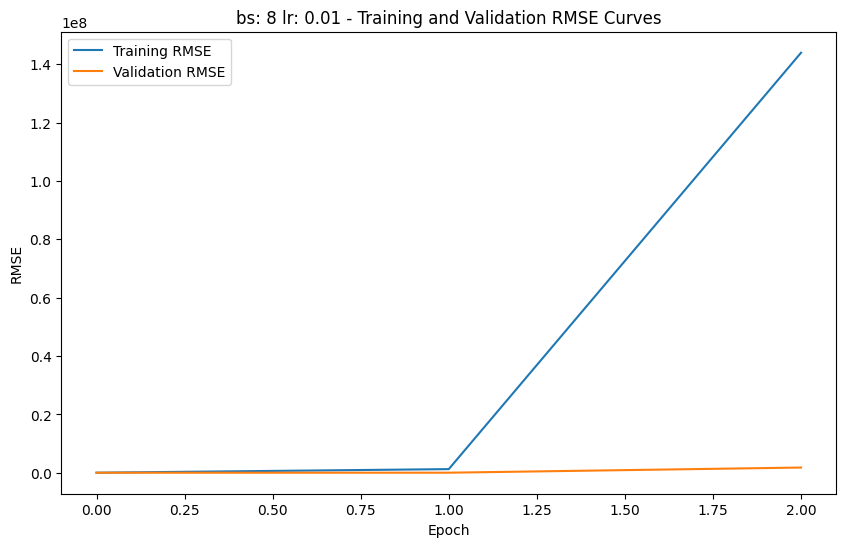

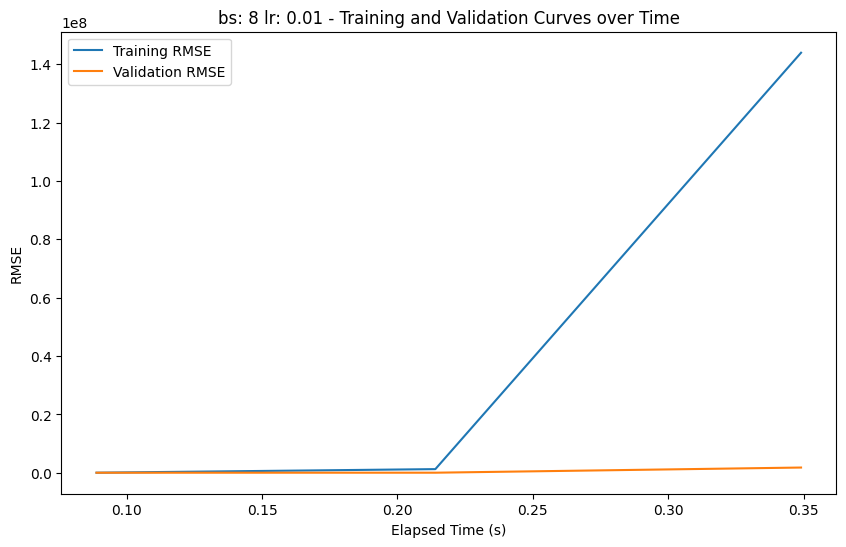

Divergence detected (rapid increase in RMSE). Stopping training.


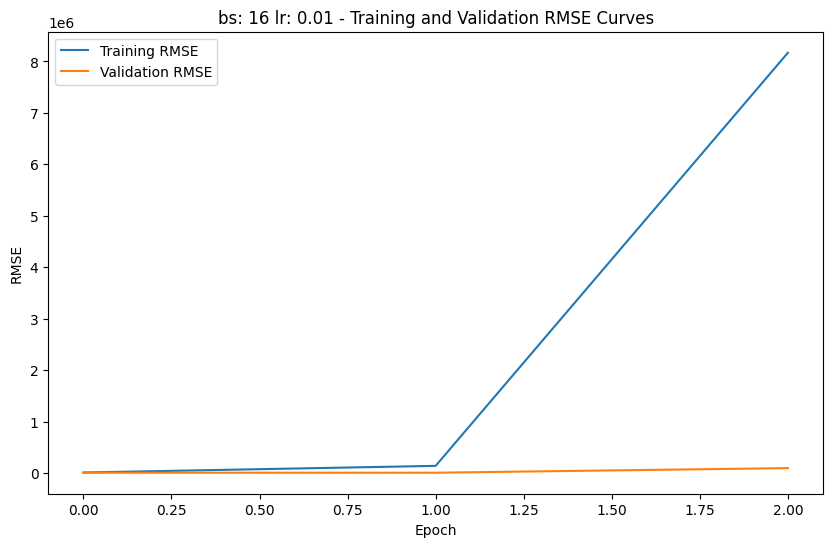

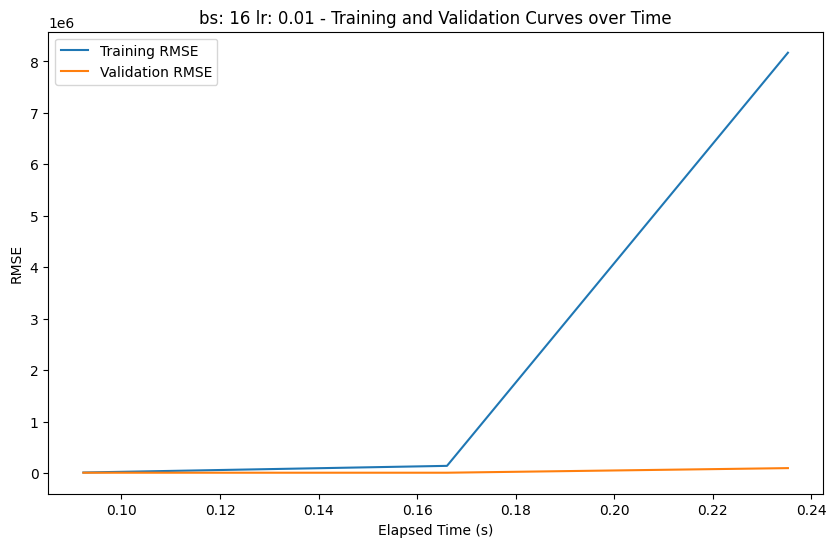

In [56]:
### YOUR CODE HERE ###
#Diverging batch sizes:
batch_sizes = [2, 8, 16] #non-converging
lr = 0.01
for batch_size in batch_sizes:
  _,training_rmse, validation_rmse, _, _ = train_mini_batch(X_train_standard_values, X_val_standard_values, y_train, y_val, batch_size, lr, max_increase_factor = 2, RMSE_direct = 8267, epochs = 1000, threshold = 1.001)

In [57]:
batch_sizes = [2,8,16] #non-converging
learning_rates = np.linspace(5e-3,1e-5,8) # pick 10 points between 0.01 and 0.00001
convergence_lrs = []
for batch_size in batch_sizes:
  for lr in learning_rates:
    _,training_rmse, validation_rmse, _, conv = train_mini_batch(X_train_standard_values, X_val_standard_values,
                                                                 y_train, y_val, batch_size, lr, max_increase_factor = 2,
                                                                 RMSE_direct = 8267, epochs = 1000, threshold = 1.001,
                                                                 plot_on = False)
    #Check for convergence (I added a boolean to the function)
    if conv:
      print(f"CONVERGENCE FOUND, LEARNING RATE: {lr} for batch size: {batch_size}")
      convergence_lrs.append(lr)
      break

Divergence detected (rapid increase in RMSE). Stopping training.
Divergence detected (rapid increase in RMSE). Stopping training.
Divergence detected (rapid increase in RMSE). Stopping training.
Divergence detected (rapid increase in RMSE). Stopping training.
Divergence detected (rapid increase in RMSE). Stopping training.
Divergence detected (rapid increase in RMSE). Stopping training.
Divergence detected (rapid increase in RMSE). Stopping training.
Convergence time: 4.109574794769287
RMSE converged to: 8272.983253687678
CONVERGENCE FOUND, LEARNING RATE: 1e-05 for batch size: 2
Divergence detected (rapid increase in RMSE). Stopping training.
Divergence detected (rapid increase in RMSE). Stopping training.
Divergence detected (rapid increase in RMSE). Stopping training.
Divergence detected (rapid increase in RMSE). Stopping training.
Divergence detected (rapid increase in RMSE). Stopping training.
Divergence detected (rapid increase in RMSE). Stopping training.
Convergence time: 0.1338

In [58]:
# The graphs above show the process of finding convergence by sweeping to ever-lower learning rates.

convergence_lr_df =pd.DataFrame({'batch size': batch_sizes,
                                'convergence learning rate': convergence_lrs})
convergence_lr_df.head()

,batch size,convergence learning rate
0,2,0.000010
1,8,0.000723
2,16,0.002149


Note these learning rate's aren't necessarily the highest possible for these batch sizes, they're merely the highest lr's which worked from the attempeted list during the learning rate sweep. Additionaly, these learning rates may change depending on weight initialization

In [62]:
batch_size = 512 # best batch size
lrs = np.linspace(0.01, 0.001,10)

train_rmse_for_rls = []
val_rmse_for_rls = []
elapsed_time_for_rls = []

for lr in lrs:
  _,training_rmse, validation_rmse, elapsed_time, _ = train_mini_batch(X_train_standard_values, X_val_standard_values,
                                                            y_train, y_val, batch_size, lr, max_increase_factor = 2,
                                                            RMSE_direct = 8267, epochs = 1000, threshold = 1.001,
                                                            plot_on = False)
  train_rmse_for_rls.append(training_rmse)
  val_rmse_for_rls.append(validation_rmse)
  elapsed_time_for_rls.append(elapsed_time)


Convergence time: 0.0784912109375
RMSE converged to: 8269.616036979407
Convergence time: 0.08539485931396484
RMSE converged to: 8273.405862251337
Convergence time: 0.10088682174682617
RMSE converged to: 8270.921677206552
Convergence time: 0.10799026489257812
RMSE converged to: 8270.735319516409
Convergence time: 0.12710928916931152
RMSE converged to: 8270.514973579773
Convergence time: 0.1806933879852295
RMSE converged to: 8272.488597600337
Convergence time: 0.340409517288208
RMSE converged to: 8274.321065068545
Convergence time: 0.3431565761566162
RMSE converged to: 8274.433722835836
Convergence time: 0.3568699359893799
RMSE converged to: 8273.662075157468
Convergence time: 0.7002992630004883
RMSE converged to: 8274.88552219719


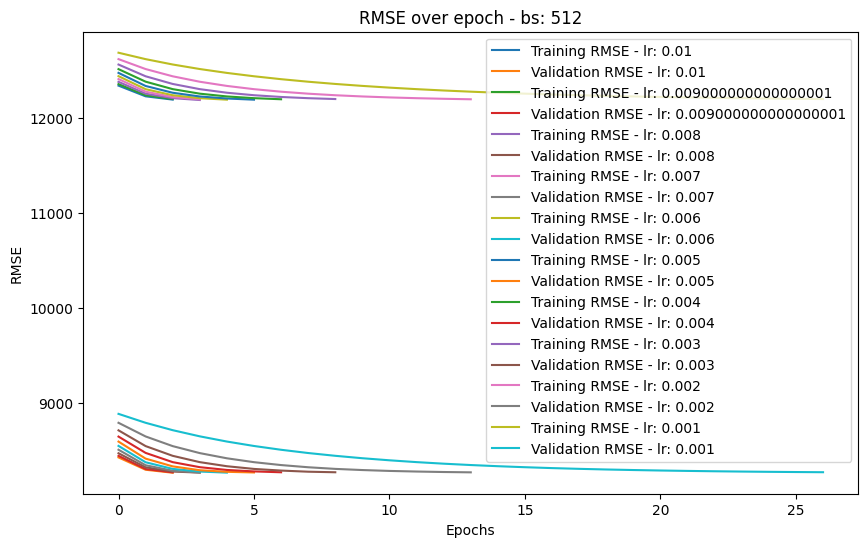

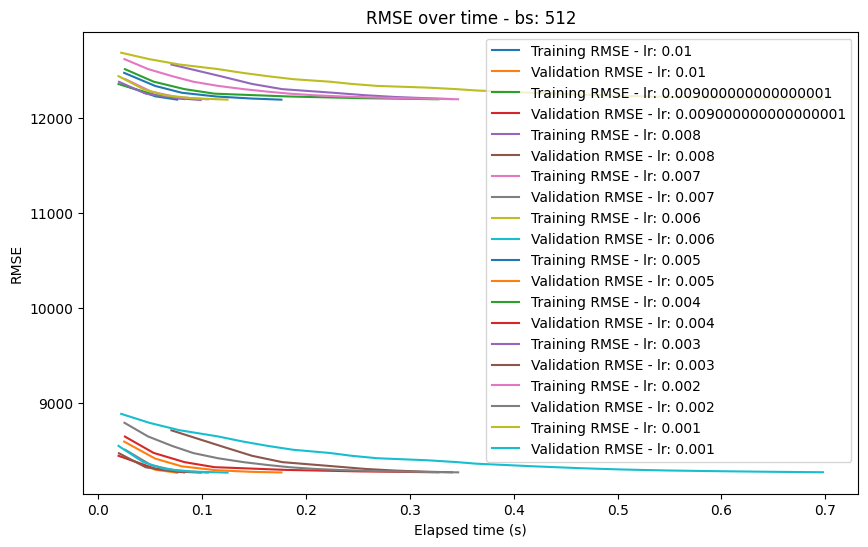

In [68]:
plt.figure(figsize = (10,6))
for i in range(len(lrs)):
  plt.plot(train_rmse_for_rls[i], label = f'Training RMSE - lr: {lrs[i]}')
  plt.plot(val_rmse_for_rls[i], label = f'Validation RMSE - lr: {lrs[i]}')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('RMSE over epoch - bs: 512')
plt.legend()
plt.show()

# plot RMSE over elapsed time
plt.figure(figsize = (10,6))
for i in range(len(lrs)):
  plt.plot(elapsed_time_for_rls[i], train_rmse_for_rls[i], label = f'Training RMSE - lr: {lrs[i]}')
  plt.plot(elapsed_time_for_rls[i], val_rmse_for_rls[i], label = f'Validation RMSE - lr: {lrs[i]}')
plt.xlabel('Elapsed time (s)')
plt.ylabel('RMSE')
plt.title('RMSE over time - bs: 512')
plt.legend()
plt.show()

In general, either a lower batch size or a higher learning rate will increase the convergence time during mini batch gradient descent. It is therefore no surprise that the highest learning rate combined with a smaller batch size will yield the fastest convergence, in this case, a batch size of 512 combined with a learning rate of 0.01 was the fastest approach, converging in just 0.078 seconds, even with all the extra if statements and calculations in the loop. That said, higher learning rate's and lower batch sizes bring risk in the form of stochasticity. With lower batch sizes, gradients are being calculated which may only apply to small portion of the data, and if your learning rate is too high, this will lead to weight updates which overshoot their loss minima and can fail to converge on a solution which generalizes to the entire set. Even if the solution is not divergent, a batch size which is too low may cause the weights to update non-optimally, taking a longer route to converge because the gradient shifts drastically between iterations. Similarily, you could use the entire batch of data to get the most representative gradient to calculate the next set of weights, but if you have a very high learning rate, the model will still overshoot and either diverge slower than optimal or begin diverging completely. I'm taking MIE 1567 Intro to Deep Learning right now, so there's a lot more I could go into on how learning rate and batch size can help with overfitting or result in a different local minima reached for convergence, but that doesn't apply to this purely linear problem. The main takeaway is that adjusting the lr and batch size can speed up convergence by updating weights more rapidly or moving faster towards the optimized solution, but a balanced must be struck between the 2 variables, and it comes at the risk of not converging at all.